# Performance of LeNet-5

In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'pdf'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [3]:
base_dir = '/home/rbodo/.snntoolbox/data/mnist/mlp/98.50'
log_dir = os.path.join(base_dir, 'log', 'gui')
runlabel_ttfs = '01'
runlabel_dyn_thresh = '03'
path_ttfs = os.path.join(log_dir, runlabel_ttfs)
path_dyn_thresh = os.path.join(log_dir, runlabel_dyn_thresh)

In [15]:
exp_ttfs = ExpResults(path_ttfs, 'TTFS base', 'o', 'blue')
exp_dyn_thresh = ExpResults(path_dyn_thresh, 'TTFS dyn thresh', '^', 'red')
experiments = [exp_ttfs, exp_dyn_thresh]

## Plot error vs operations

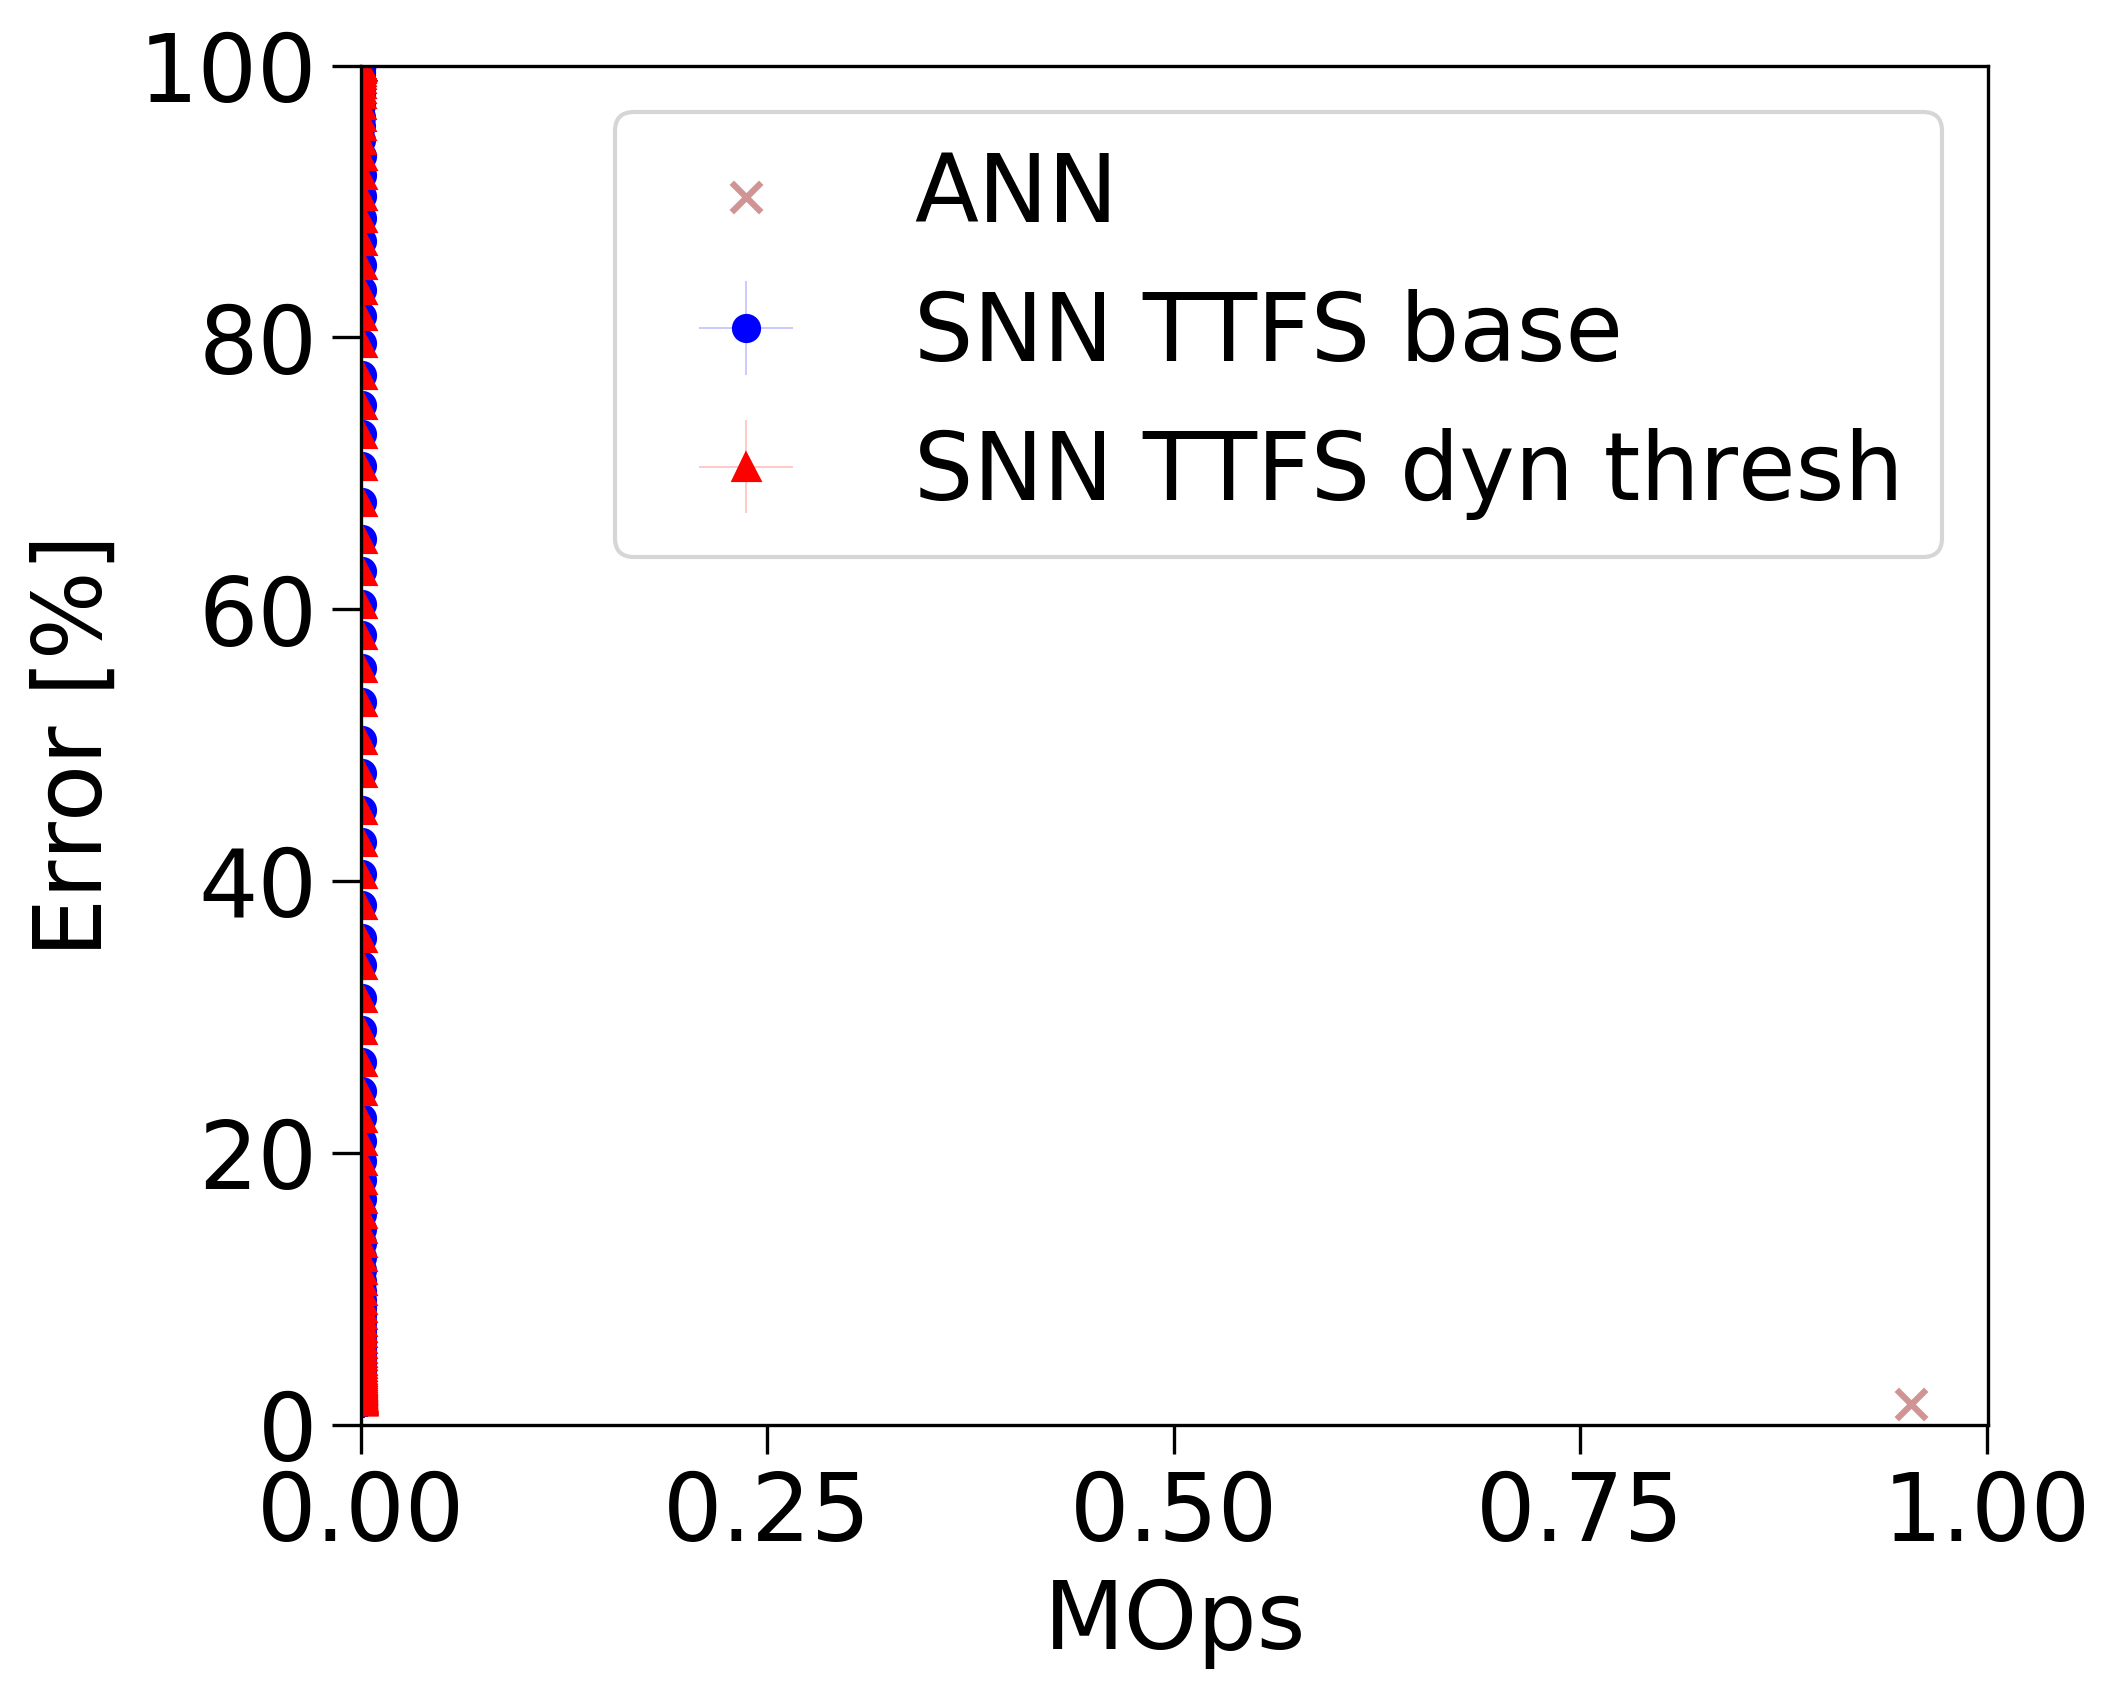

In [11]:
show_numbers = False

for exp in experiments:
    plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                 yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

exp = experiments[0]
plt.scatter(exp.operations_ann, exp.e1_ann, marker='x', s=50, label='ANN', color='brown', alpha=0.5)

if show_numbers:
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.8, exp.e1_ann + 7), fontsize=16, color=exp.color1)
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.op1_0, exp.e1_0), xy=(exp.op1_0, exp.e1_0),
                 xytext=(exp.op1_0, exp.e1_0 + 13), fontsize=16,
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.ylim(0, 100)
plt.xlim(0, None)
plt.ylabel('Error [%]')
plt.xlabel('MOps')
plt.legend(loc='upper right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops_mnist'), bbox_inches='tight')

In [12]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('')

TTFS base
ANN top-1:                         (0.95341 MOps/frame, 1.50 %)
SNN top-1 best error:         (0.00059 MOps/frame, 1.65 %)

TTFS dyn thresh
ANN top-1:                         (0.95341 MOps/frame, 1.50 %)
SNN top-1 best error:         (0.00059 MOps/frame, 1.77 %)



In [14]:
import numpy as np
np.argmin(experiments[1].e1_mean)

188